In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [28]:
np.random.seed(123)

Load MNIST dataset.

In [29]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

The training data consists of 60000 rows of 28x28 grayscale images. 

Let's take a look at its shape to confirm.

In [30]:
x_train_raw.shape

(60000, 28, 28)

Taking a quick look at the content of our training data.

In [31]:
np.set_printoptions(edgeitems=x_train_raw.shape[1])   # display non-truncated columns


An individual training data has the following shape.

In [32]:
x_train_raw[0].shape

(28, 28)

Display content of an individual training data.

In [33]:
x_train_raw[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Display the images within the training data

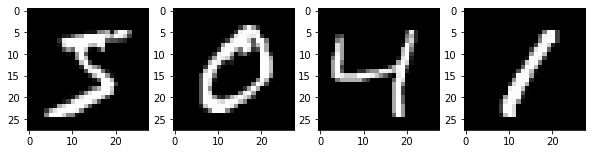

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,5))

ax[0].imshow(x_train_raw[0], cmap='gray')
ax[1].imshow(x_train_raw[1], cmap='gray')
ax[2].imshow(x_train_raw[2], cmap='gray')
ax[3].imshow(x_train_raw[3], cmap='gray')

In [35]:
x_train_raw[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Our 'labels' are digit values that correspond to the images.

In [36]:
y_train_raw

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, ..., 0, 9, 2, 4, 6, 7, 3, 1, 3, 6, 6, 2, 1, 2, 6,
       0, 7, 8, 9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=uint8)

Reshape training and test data to a format that Tensorflow can accept for computation. 

A CNN takes tensors of shape (image_height, image_width, color_channels). For RBG images, the shape should be (image_height, image_width, 3). For grayscale images, the shape should be (image_height, image_width, 1).

Let's now reshape our grayscale images into (28, 28, 1).

In [37]:
x_train = np.reshape(x_train_raw, (x_train_raw.shape[0], 28, 28, 1))
x_test = np.reshape(x_test_raw, (x_test_raw.shape[0], 28, 28, 1))

In [38]:
x_train.shape

(60000, 28, 28, 1)

We have transformed individual training and test data to have the shape (28, 28, 1)

In [39]:
x_train[0].shape

(28, 28, 1)

An individual training and test data now looks like this.

In [40]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

Display how the new transformed data looks like.

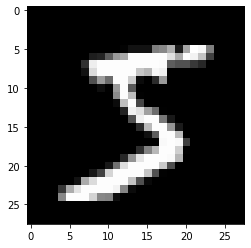

In [41]:
plt.imshow(x_train[0], cmap='gray')


Normalized the values by 255 as each "pixel" of our image can take a value between 0 to 255.

In [42]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [43]:
x_train_norm

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [44]:
labels = np.unique(y_test_raw)
labels


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
n_labels = len(labels)
n_labels

10

One-hot encode our labels.

In [46]:
y_train_1hot = tf.keras.utils.to_categorical(y_train_raw, n_labels)
y_test_1hot = tf.keras.utils.to_categorical(y_test_raw, n_labels)

Take a look at the one-hot encoded data.

In [47]:
y_train_1hot

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 

Construct the architecture of our CNN.

In [48]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Specify hyper-parameters.

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train our CNN model.

In [50]:
hist = model.fit(x=x_train, y=y_train_1hot, batch_size=512, epochs=10)

Epoch 1/10
118/118 [==============================] - 59s 490ms/step - loss: 1.7562 - accuracy: 0.7613
Epoch 2/10
118/118 [==============================] - 43s 364ms/step - loss: 0.2293 - accuracy: 0.9342
Epoch 3/10
118/118 [==============================] - 43s 364ms/step - loss: 0.1496 - accuracy: 0.9567
Epoch 4/10
118/118 [==============================] - 45s 383ms/step - loss: 0.1255 - accuracy: 0.9627
Epoch 5/10
118/118 [==============================] - 44s 374ms/step - loss: 0.1063 - accuracy: 0.9695
Epoch 6/10
118/118 [==============================] - 45s 377ms/step - loss: 0.0940 - accuracy: 0.9722
Epoch 7/10
118/118 [==============================] - 45s 377ms/step - loss: 0.0833 - accuracy: 0.9740
Epoch 8/10
118/118 [==============================] - 45s 378ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 9/10
118/118 [==============================] - 45s 378ms/step - loss: 0.0720 - accuracy: 0.9795
Epoch 10/10
118/118 [==============================] - 45s 377ms/step - l

Test our CNN model and perform evaluation.

In [51]:
loss, accuracy = model.evaluate(x=x_test, y=y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0412 - accuracy: 0.9877
loss = 0.041156549006700516
accuracy = 0.9876999855041504


Plot the loss and accuracy.

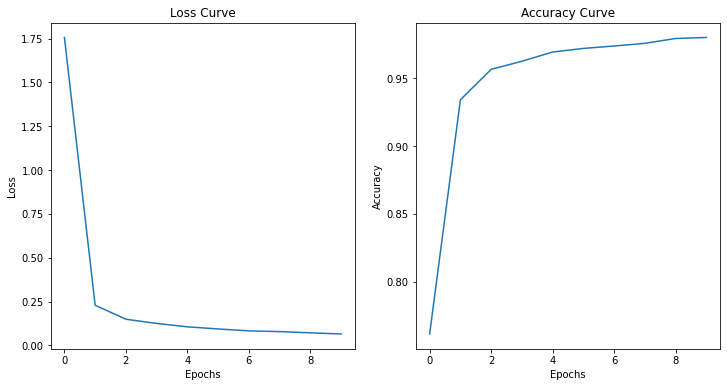

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()